# Latar Belakang
Dataset ini adalah kumpulan data e-commerce ritel terbesar dari Pakistan. Dataset ini berisi setengah juta catatan transaksi dari Maret 2016 hingga Agustus 2018. Data dikumpulkan dari berbagai pedagang e-commerce sebagai bagian dari studi penelitian. 

# Goals
tujuan dari dilakukannya *Exploratory Data Analysis* adalah untuk memahami performa dari e-commerce di Pakistan dan memberikan saran untuk meningkatkan keuntungan berupa sales penjualan bagi e-commerce tersebut

# Batasan Masalah
1. Membahas sales penjualan
2. Membahas kategori barang yang dibeli
3. Membahas metode pembayaran

# Mengimport Library
pada kesempatan ini kita akan mengimport library berupa numpy, pandas, matplotlib, dan seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')

# Membaca Dataset
Dataset bersumber dari kaggle dan dapat di unduh melalui link https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset
Berikut adalah interpretasi kolom data :
1. Item_id :  Nomor urut dari barcode barang yang dipesan
2. Status : Status barang yang dipesan
3. Created_at : Tanggal dilakukannya pemesanan barang
4. Sku : kode unik yang terdiri dari huruf dan angka yang mengidentifikasi karakteristik setiap produk.
5. Price : Harga tiap unit dari produk yang dijual
6. Qty_ordered : Jumlah total unit barang yang dipesan
7. Grand_total : Total harga keseluruhan yang dibayar oleh customer
8. Increment_id : kode struk
9. Category_name_1 : Kategori barang
10. Sales_commision_code : Kode komisi penjualan
11. Discount_amount : jumlah diskon yang diberikan
12. Payment_method : metode pembayaran 
13. Working_date : Jam kerja 
14. BI_Status : Memberikan informasi terkait kelanjutan proses pemesanan barang 
15. MV : Harga satuan produk
16. Year : Tahun customer bergabung
17. Month : Bulan customer bergabung 
18. Customer_since : informasi tanggal,bulan dan tahun customer bergabung
19. M-Y : informasi tentang bulan dan tahun terjadinya transaksi
20. FY : tahun fiskal perusahaan 
21. Customer_ID : Nomor customer
22. Unnamed : 21 : Empty Column
23. Unnamed : 22 : Empty Column
24. Unnamed : 23 : Empty Column
25. Unnamed : 24 : Empty Column
26. Unnamed : 25 : Empty Column

In [3]:
data = pd.read_csv(r'D:\purwadhika\project 2\Pakistan Largest Ecommerce Dataset.csv')

In [4]:
data.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


mengetahui informasi dari dataset

In [5]:
Dataset = []
for i in data.columns :
    Dataset.append([
        i,
        data[i].dtypes,
        data[i].isna().sum(),
        round((data[i].isna().sum()/len(data))*100,2),
        data[i].nunique()
    ])
pd.DataFrame(data = Dataset,
            columns=[
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique'
            ])

,Features,DataType,Null,NullPercentage,Unique
0,item_id,float64,464051,44.26,584524
1,status,object,464066,44.26,16
2,created_at,object,464051,44.26,789
3,sku,object,464071,44.26,84889
4,price,float64,464051,44.26,9121
5,qty_ordered,float64,464051,44.26,74
6,grand_total,float64,464051,44.26,36829
7,increment_id,object,464051,44.26,408785
8,category_name_1,object,464215,44.27,16
9,sales_commission_code,object,601226,57.34,7226


# Data Preparation

## 1. Menghitung dan menghapus data terduplikasi
Data duplikat tidak dibutuhkan dalam Exploratory Data Analysis, oleh karenanya data tersebut dihapus.

In [6]:
data.duplicated().sum()

464050

In [7]:
data = data.drop_duplicates()

## 2. Menghitung data Missing Value setelah duplikasi data terhapus 
Missing value adalah tipe data yang tidak ada isinya, oleh karenanya kita dapat mengisinya atau menghapus missing value dari data tersebut

In [8]:
data.isna().sum()

item_id                       1
status                       16
created_at                    1
sku                          21
price                         1
qty_ordered                   1
grand_total                   1
increment_id                  1
category_name_1             165
sales_commission_code    137176
discount_amount               1
payment_method                1
Working Date                  1
BI Status                     1
 MV                           1
Year                          1
Month                         1
Customer Since               12
M-Y                           1
FY                            1
Customer ID                  12
Unnamed: 21              584525
Unnamed: 22              584525
Unnamed: 23              584525
Unnamed: 24              584525
Unnamed: 25              584525
dtype: int64

## 3. Menghitung persentase missing value
Walaupun terdapat missing value di setiap kolom namun persentasenya rata-rata hanyalah 0%, hanya kolom sales_commission_code dan kolom Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25 yang memiliki persentase missing value yang cukup besar

In [9]:
round(data.isna().sum()/data.shape[0]*100, 2)

item_id                    0.00
status                     0.00
created_at                 0.00
sku                        0.00
price                      0.00
qty_ordered                0.00
grand_total                0.00
increment_id               0.00
category_name_1            0.03
sales_commission_code     23.47
discount_amount            0.00
payment_method             0.00
Working Date               0.00
BI Status                  0.00
 MV                        0.00
Year                       0.00
Month                      0.00
Customer Since             0.00
M-Y                        0.00
FY                         0.00
Customer ID                0.00
Unnamed: 21              100.00
Unnamed: 22              100.00
Unnamed: 23              100.00
Unnamed: 24              100.00
Unnamed: 25              100.00
dtype: float64

## 4. Fillna kolom sales commission code
dikarenakan pada kolom sales_commission_code memiliki persentase missing value yang cukup besar yakni sebesar 23,47% maka dilakukan analisa data pada kolom tersebut dan diketahui bahwa missing value pada data tersebut diakibatkan oleh ketiadaannya diskon. Oleh karenanya dilakukan pengisian missing value dengan kalimat 'No Commission'.

In [10]:
data[data['sales_commission_code'].isna() == True]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
135887,381711.0,complete,1/4/2017,jockey_J260-1013-3-M,715.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,1/4/2017,Net,715,2017.0,1.0,2016-10,1-2017,FY17,11660.0,NaN,NaN,NaN,NaN,NaN
135888,381713.0,complete,1/4/2017,BO_nonRC-Jeep-Silver,250.0,1.0,1714.0,100256851,Kids & Baby,NaN,0.0,cod,1/4/2017,Net,250,2017.0,1.0,2016-10,1-2017,FY17,11660.0,NaN,NaN,NaN,NaN,NaN
135889,381714.0,complete,1/4/2017,aybeez_ABZ-3338-M,299.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,1/4/2017,Net,299,2017.0,1.0,2016-10,1-2017,FY17,11660.0,NaN,NaN,NaN,NaN,NaN
135890,381716.0,complete,1/4/2017,PC_3P COMBED-008,450.0,1.0,1714.0,100256851,Men's Fashion,NaN,0.0,cod,1/4/2017,Net,450,2017.0,1.0,2016-10,1-2017,FY17,11660.0,NaN,NaN,NaN,NaN,NaN
281723,557053.0,complete,8/10/2017,JSM_JSM-003-ComboGreenWhitePakShirt-M,180.0,2.0,360.0,100345578,\N,NaN,0.0,cod,8/10/2017,Net,360,2017.0,8.0,2016-11,8-2017,FY18,17022.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584520,905205.0,processing,8/28/2018,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0,NaN,NaN,NaN,NaN,NaN
584521,905206.0,processing,8/28/2018,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0,NaN,NaN,NaN,NaN,NaN
584522,905207.0,processing,8/28/2018,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0,NaN,NaN,NaN,NaN,NaN
584523,905208.0,processing,8/28/2018,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,0.0,bankalfalah,8/28/2018,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0,NaN,NaN,NaN,NaN,NaN


In [11]:
data['sales_commission_code'].fillna('No Commission', inplace=True)

## 5. Mengubah nama kolom MV dikarenakan adanya salah ketik dari kolom tersebut
Pengubahan ini dilakukan agar proses explanatory data analysis menjadi lebih lancar

In [12]:
data.rename(columns={' MV ':'MV'},inplace=True)

## 6. Menghapus kolom yang tidak dibutuhkan dari dataset Pakistan Largest Ecommerce Dataset
Kolom dengan nama Unnamed tidak memiliki isi sama sekali dan memberikan persentase missing value sebesar 100%. Oleh karenanya dilakukan penghapusan

In [13]:
data.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace=True)

## 7. Menghapus missing value sisanya
Missing value lainnya sisanya dihapus karena persentase datanya sangat kecil

In [14]:
data.isna().sum()

item_id                    1
status                    16
created_at                 1
sku                       21
price                      1
qty_ordered                1
grand_total                1
increment_id               1
category_name_1          165
sales_commission_code      0
discount_amount            1
payment_method             1
Working Date               1
BI Status                  1
MV                         1
Year                       1
Month                      1
Customer Since            12
M-Y                        1
FY                         1
Customer ID               12
dtype: int64

In [15]:
data = data.dropna()

## 8. akhirnya permasalahan missing value sudah teratasi

In [16]:
data.isna().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
MV                       0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

## 9. Memperbaiki metode pembayaran
Dalam metode pembayaran dengan sintaks data['payment_method'].unique() dapat diketahui bahwa terdapat beberapa duplikasi seperti Easypay_MA, easypay_voucher dan Easypay yang memiliki kesamaan sehingga dapat disatukan menjadi Easypay. 

In [17]:
data['payment_method'].unique()

array(['cod', 'ublcreditcard', 'mygateway', 'customercredit',
       'cashatdoorstep', 'mcblite', 'internetbanking', 'marketingexpense',
       'productcredit', 'financesettlement', 'Payaxis', 'jazzvoucher',
       'jazzwallet', 'Easypay', 'Easypay_MA', 'easypay_voucher',
       'bankalfalah', 'apg'], dtype=object)

In [18]:
payment_to_replace = {'cashatdoorstep': 'cod', 'Easypay_MA':'Easypay', 'easypay_voucher':'Easypay',
                      'jazzvoucher':'jazzwallet','internetbanking':'Payaxis','mygateway':'Payaxis',
                      'marketingexpense':'Payaxis'} 
data = data.replace({"payment_method": payment_to_replace})

## 10. Menghapus nilai anomali dari beberapa kolom

In [19]:
data.drop(data[(data['status']=='\\N')].index,inplace=True)

In [20]:
data.drop(data[(data['category_name_1']=='\\N')].index,inplace=True)

In [21]:
data.drop(data[(data['BI Status']=='#REF!')].index,inplace=True)

In [22]:
data.drop(data[(data['sales_commission_code']=='\\N')].index,inplace=True)

# statistika
pada analisa statistika capstone modul 2 ini hanya dibutuhkan analisa statistika deskriptif saja untuk pengolahan data. 

## Analisa Statistika Deskriptif untuk data Numerikal
Analisa statistika deskriptif untuk data numerikal terbagi menjadi 2 yaitu pengukuran tendency sentral dan pengukuran variability

### 1. Pengukuran Tendency Sentral
Dilakukan untuk mengetahui mean, median, dan modus dari data numerikal

Dengan fungsi data.describe langsung dapat diketahui mean, dan median (50%) dari data tersebut

In [23]:
data.describe().T[['mean', '50%']]

,mean,50%
item_id,684022.733758,766343.5
price,8287.722955,1000.0
qty_ordered,1.415676,1.0
grand_total,10968.803276,2427.2
discount_amount,664.711946,0.0
Year,2017.506163,2018.0
Month,5.570378,5.0
Customer ID,60539.387151,71002.0


Sedangkan untuk modus dapat diketahui dari kodingan di bawah ini

In [24]:
modus_price = data['price'].mode()[0]
modus_qty_ordered =data['qty_ordered'].mode()[0]
modus_grand_total =data['grand_total'].mode()[0]
modus_discount_amount =data['discount_amount'].mode()[0]
print('Besarnya modus dari data')
print('-'*50)
print('modus_price :', modus_price)
print('modus_qty_ordered :', modus_qty_ordered)
print('modus_grand_total:', modus_grand_total)
print('modus_discount_amount:', modus_discount_amount)

Besarnya modus dari data
--------------------------------------------------
modus_price : 1000.0
modus_qty_ordered : 1.0
modus_grand_total: 0.0
modus_discount_amount: 0.0


### 2. Pengukuran Variabilitas
Dilakukan untuk mengetahui range data, standar deviasi, dan IQR dari data numerikal

Untuk range data dapat diketahui dari kodingan di bawah ini

In [25]:
range_price = data['price'].max()-data['price'].min()
range_qty_ordered =data['qty_ordered'].max()-data['qty_ordered'].min()
range_grand_total =data['grand_total'].max()-data['grand_total'].min()
range_discount_amount =data['discount_amount'].max()-data['discount_amount'].min()
print('Besarnya range dari data')
print('-'*50)
print('range_price :', range_price)
print('range_qty_ordered :', range_qty_ordered)
print('range_grand_total:', range_grand_total)
print('range_discount_amount:', range_discount_amount)

Besarnya range dari data
--------------------------------------------------
range_price : 1012625.9
range_qty_ordered : 499.0
range_grand_total: 1041073.0
range_discount_amount: 50355.25


Dengan fungsi data.describe langsung dapat diketahui standar deviasinya dari data tersebut

In [26]:
data.describe().T[['std']]

,std
item_id,207244.487222
price,17568.439706
qty_ordered,2.734644
grand_total,27698.797524
discount_amount,1691.442444
Year,0.739318
Month,3.272246
Customer ID,40371.790737


Untuk IQR data dapat diketahui dari kodingan di bawah ini

In [27]:
IQR_price = data.describe()['price']['75%']-data.describe()['price']['25%']
IQR_qty_ordered =data.describe()['qty_ordered']['75%']-data.describe()['qty_ordered']['25%']
IQR_grand_total =data.describe()['grand_total']['75%']-data.describe()['grand_total']['25%']
IQR_discount_amount =data.describe()['discount_amount']['75%']-data.describe()['discount_amount']['25%']
print('Besarnya IQR dari data')
print('-'*50)
print('IQR_price :', IQR_price)
print('IQR_qty_ordered :', IQR_qty_ordered)
print('IQR_grand_total:', IQR_grand_total)
print('IQR_discount_amount:', IQR_discount_amount)

Besarnya IQR dari data
--------------------------------------------------
IQR_price : 7990.0
IQR_qty_ordered : 0.0
IQR_grand_total: 9900.0
IQR_discount_amount: 371.175


## Analisa Statistika Deskriptif untuk data Kategorikal
Dilakukan untuk mengetahui count, unique, top, dan freq dari data

In [28]:
data.describe(include='O')

,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,243714,243714,243714,243714,243714,243714,243714,243714,243714,243714,243714,243714,243714
unique,13,786,47921,183796,15,7175,11,786,3,7774,26,26,3
top,complete,3/28/2018,MATSAM59DB75ADB2F80,100476608,Mobiles & Tablets,No Commission,cod,3/28/2018,Net,999,2016-7,3-2018,FY18
freq,84168,6256,2172,43,51126,136977,109546,6256,84337,3917,35565,41942,165220


# Business Question, Analisis dan Saran

## 1. Berapa total besarnya sales penjualan setiap bulannya, dari Juli 2016 hingga Agustus 2018
Dikarenakan data berbentuk time series maka visualisasi dari business question dilakukan dengan grafik line plot.

In [29]:
data['Year'] = data['Year'].astype('int')
data['Month'] = data['Month'].astype('int')

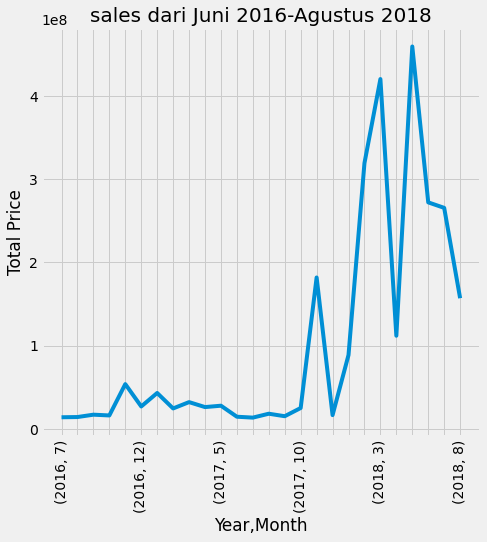

In [30]:
a = data.groupby(['Year','Month'])['grand_total'].sum()
plt.figure(figsize=(7,7))
a.plot(x=['Year','Month'], y = 'grand_total', kind='line')
plt.title('sales dari Juni 2016-Agustus 2018', fontsize=20)
plt.xticks(np.arange(26), rotation=90)
plt.xlabel('Year,Month')
plt.ylabel('Total Price')
plt.show()

### Analisis

Berdasarkan grafik sales penjualan setiap bulannya, dari Juli 2016 hingga Agustus 2018 diketahui bahwa terdapat fluktuasi terhadap total harga penjualan. Namun dari fluktuasi tersebut terdapat trend signifikan yang mengarah kepada peningkatan total harga penjualan. Hal ini sejajar dengan fakta bahwa Industri e-commerce di Pakistan mengalami pertumbuhan yang signifikan selama beberapa tahun terakhir dan keuntungan industri ini diperkirakan mencapai Rs. 51,8 miliar pada Tahun 2017 yang meningkat menjadi 99,3 miliar pada Tahun 2018. Peningkatan ini menunjukkan pertumbuhan sebesar 92%(KCCI, 2019).

Source : 
KCCI. 2019. E-commerce: A plausible solution to Pakistanâ€™s economic woes. Karachi Chamber of Commerce & Industry

### Rekomendasi

Lakukan berbagai promosi untuk generasi muda (dibawah 29 tahun) untuk menggunakan Ecommerce!  Rekomendasi ini didasari oleh informasi 64% penduduk Pakistan berusia di bawah 29 tahun dan lebih terbuka terhadap teknologi informasi dan komunikasi (Pakistan Goverment, 2019).

Source : 
Government of Pakistan Ministry of Commerce & Textile (Commerce Division). 2019. E-COMMERCE POLICY FRAMEWORK OF PAKISTAN.

## 2. Berapa total rata-rata harga sales penjualan setiap bulan
Fungsi agregasi rata-rata dilakukan karena data sales penjualan perbulannya tidak lengkap sebanyak 36 bulan.

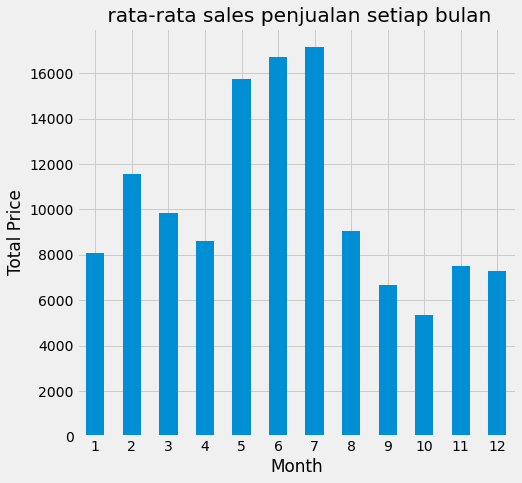

In [31]:
b = data.groupby('Month')['grand_total'].mean()
plt.figure(figsize=(7,7))
b.plot(x='Month', y = 'grand_total', kind='bar')
plt.title(' rata-rata sales penjualan setiap bulan')
plt.xticks(np.arange(12), rotation=0)
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.show()

### Analisis

Berdasarkan grafik rata-rata besarnya sales penjualan setiap bulan diketahui bahwa 3 rata-rata harga penjualan tertinggi terjadi di bulan Mei, Juni, dan Juli. Hal ini bertepatan dengan bulan puasa yang terjadi di periode tersebut yakni bulan puasa tahun 2016 (5 Juni- 5 Juli), bulan puasa tahun 2017 (25 Mei-25 Juni), dan bulan puasa tahun 2018 (15 Mei- 15 Juni). Informasi ini sesuai dengan berita bahwa Heavy Traffic pembelian di ecommerce Pakistan terjadi di Idul Fitri(bulan puasa).

Source :
https://www.trade.gov/country-commercial-guides/pakistan-e

### Rekomendasi

Tingkatkan pemberian promosi dan diskon di bulan puasa! Berdasarkan grafik diskon Juli 2016 hingga Agustus 2018 dibawah ini, pemberian diskon masih kurang tepat karena tidak sesuai dengan Heavy Traffic pembelian di ecommerce. Diharapkan dengan banyaknya promosi dan diskon dapat mendongkrak penjualan di bulan tersebut.

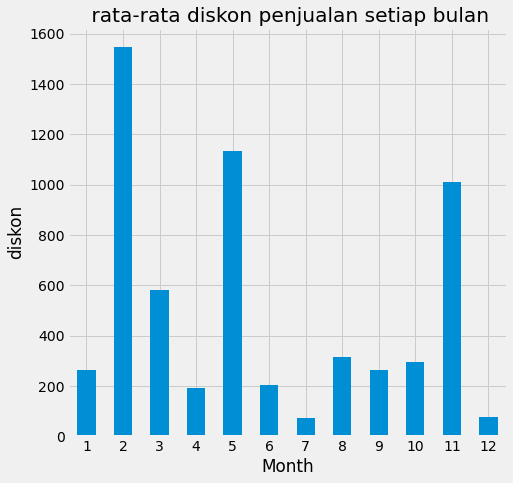

In [32]:
i = data.groupby('Month')['discount_amount'].mean()
plt.figure(figsize=(7,7))
i.plot(x='Month', y = 'diskon', kind='bar')
plt.title(' rata-rata diskon penjualan setiap bulan')
plt.xticks(np.arange(12), rotation=0)
plt.xlabel('Month')
plt.ylabel('diskon')
plt.show()

## 3. Bagaimana rata-rata sales penjualan setiap tahunnya
Fungsi Agregat mean digunakan karena jumlah data sales penjualan per tahun tidak full 36 bulan/3 tahun

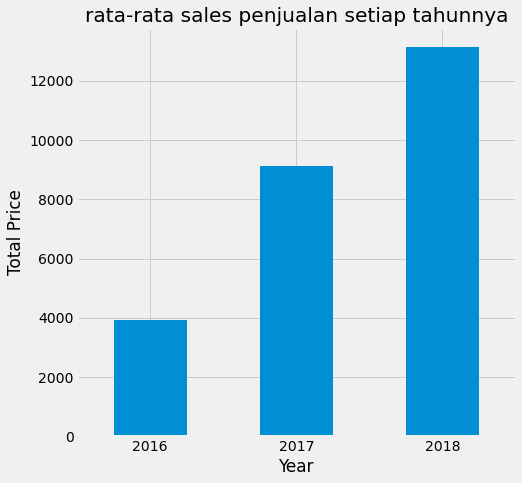

In [33]:
c = data.groupby('Year')['grand_total'].mean()
plt.figure(figsize=(7,7))
c.plot(x='Year', y = 'grand_total', kind='bar')
plt.title('rata-rata sales penjualan setiap tahunnya')
plt.xticks(np.arange(3), rotation=0)
plt.xlabel('Year')
plt.ylabel('Total Price')
plt.show()

### Analisis 

Rata-Rata Sales penjualan meningkat setiap tahunnya. Hal ini sesuai dengan informasi bahwa Industri e-commerce di Pakistan mengalami pertumbuhan yang signifikan dalam beberapa tahun terakhir. (Javed, 2020)

Source : 
Javed, A. (2020). Prospects and Problems for E-commerce in Pakistan. Asian Journal of Economics, Finance and Management, 131-139.

### Rekomendasi

Sebaiknya penyedia Platform Ecommerce Pakistan melakukan kerja sama dengan pemerintah Pakistan dalam meningkatkan penjual dan pembeli di platform Ecommerce. Keberadaan Ecommerce ini dapat menjadi lebih signifikan dalam menyediakan lapangan kerja bagi sekitar 130 juta pemuda Pakistan dalam 30 tahun ke depan. (Pakistan Goverment, 2019)

Source :
Government of Pakistan Ministry of Commerce & Textile (Commerce Division). 2019. E-COMMERCE POLICY FRAMEWORK OF PAKISTAN.

## 4. Jumlah pembelian per kategori barang 
Business Question ini bertujuan untuk mengetahui kategori barang mana saja yang menjadi top seller dari Juli 2016 hingga Agustus 2018

In [34]:
kategori_barang=data['category_name_1'].value_counts().values
jumlah=data['category_name_1'].value_counts().index

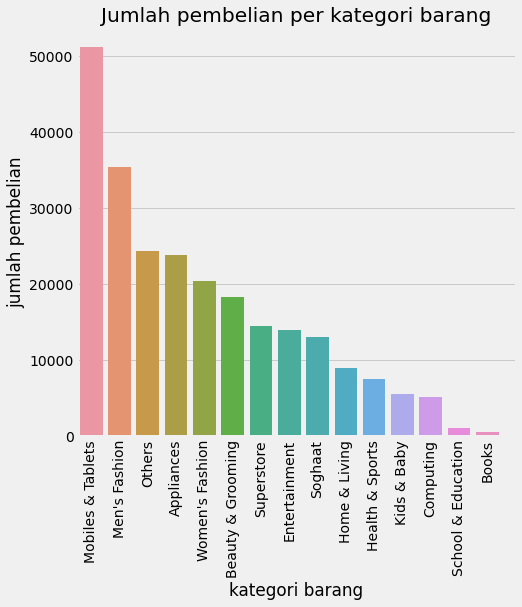

In [35]:
plt.figure(figsize=(7,7))
sns.barplot(x=jumlah, y=kategori_barang, data=data)
plt.title('Jumlah pembelian per kategori barang')
plt.xticks(np.arange(16), rotation=90)
plt.xlabel('kategori barang')
plt.ylabel('jumlah pembelian')
plt.show()

### Analisis

Berdasarkan grafik diatas diketahui bahwa jumlah pembelian per kategori barang terbanyak adalah mobile & tablet sebesar 51126 barang yang disusul dengan mens fashion sebesar 35345 barang. Hal ini sejajar dengan informasi bahwa alasan utama banyaknya pembelian online mobile & tablet adalah harganya yang ekonomis dibandingkan dengan berbelanja secara offline (Khan dkk, 2014) dan pria Pakistan senang membeli pakaian bermerek dibandingkan dengan wanita pakistan saat berbelanja pakaian (Shabbir, 2012). 

Source :
- Khan, A. S., Ahmed, F., Yousuf, H., Hassan, S., & Zia, S. A. (2014). Online shopping behavior in Pakistan. In International Conference on Marketing. Institute of Business Administration in Karachi (pp. 1-42).
- Shabbir, M. J. (2012). Consumer shopping characteristics approach and gender difference in Pakistan. International journal of trends in marketing management, (1).

### Rekomendasi

perbanyak diskon pada kedua item tersebut untuk meningkatkan jumlah pembelian per kategori barang

## 5. Jumlah total harga pembelian per masing masing kategori barang
Business Question ini bertujuan untuk mengetahui berapa total biaya yang dihabiskan oleh customer pada kategori barang tertentu

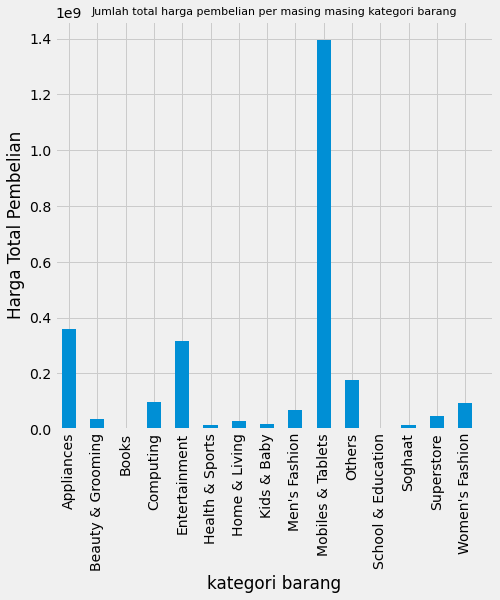

In [37]:
d=data.groupby('category_name_1')['grand_total'].sum()
plt.figure(figsize=(7,7))
d.plot(x='category_name_1', y='grand_total', kind='bar')
plt.title('Jumlah total harga pembelian per masing masing kategori barang', fontsize=11)
plt.xticks(np.arange(16), rotation=90)
plt.xlabel('kategori barang')
plt.ylabel('Harga Total Pembelian')
plt.show()

### Analisis

Berdasarkan grafik jumlah total harga pembelian per masing masing kategori barang, pembelian Mobile & Tablet berada di urutan pertama yakni 1,39 Milyar. Hal ini sesuai dengan informasi presentasi pengguna internet di Pakistan yang meningkat sebesar 20 persen pada tahun 2016. Pengguna media sosial aktif Pakistan tumbuh lebih cepat dengan pertumbuhan 35 persen dari tahun ke tahun. (www.techinasia.com). Pembelian Mobile & Tablet juga menjadi kategori barang dengan jumlah pembelian terbanyak.

Source :
https://www.techinasia.com/pakistan-digital-landscape-2016

### Rekomendasi

Pembelian buku merupakan kategori barang dengan jumlah pembelian terendah yakni hanya sebesar 965 ribu barang, sangat jauh lebih rendah dibandingkan dengan yang lainnya. Hal ini sesuai dengan informasi bahwa sepertiga orang Pakistan tidak dapat menulis dan membaca paragraf dalam bahasa apapun. Hal ini juga dapat menjadi potensi bagi pemerintah dan penyedia Ecommerce untuk menjadikan Ecommerce sebagai sumber kampanye untuk meningkatkan minat baca masyarakat Pakistan.

Source :
Pakistan National Education Policy Framework, 2018

## 6. Metode Pembayaran per kategori barang
Business Question ini bertujuan untuk metode pembayaran yang sering dilakukan untuk membeli barang tertentu.

In [38]:
pembayaran = data.groupby('payment_method')['category_name_1'].count()

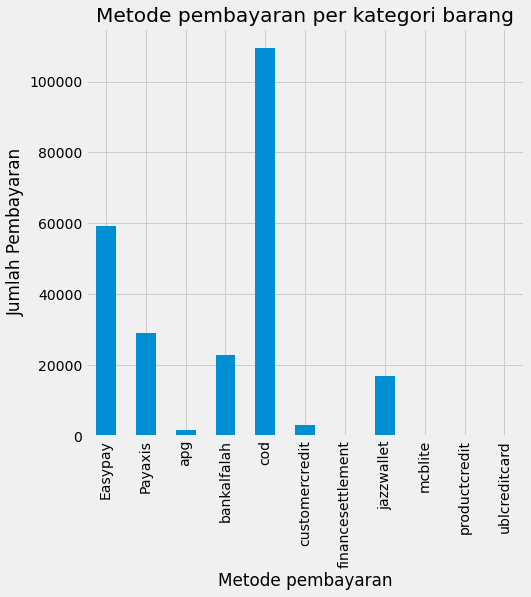

In [39]:
plt.figure(figsize=(7,7))
pembayaran.plot(x='payment_method', y='category_name_1', kind='bar')
plt.title('Metode pembayaran per kategori barang')
plt.xticks(np.arange(11), rotation=90)
plt.xlabel('Metode pembayaran')
plt.ylabel('Jumlah Pembayaran')
plt.show()

### Insight

Berdasarkan grafik diketahui bahwa COD (Cash On Delivery) menjadi sumber metode pembayaran terbesar dengan jumlah lebih dari 109 ribu transaksi. Hal ini sejajar dengan informasi bahwa Pakistan merupakan cash-driven economy dikarenakan jumlah pemegang kartu debit/kredit dan akun m-walletnya sangat rendah. Lebih dari 95% transaksi perdagangan elektronik dilakukan secara tunai (Imtiaz dkk, 2020).

Source :
Imtiaz, S., Ali, S. H., & Kim, D. J. (2020). E-commerce growth in Pakistan: Privacy, security, and trust as potential issues. Culinary Science & Hospitality Research, 26(2), 10-18.

### Rekomendasi

Saat ini metode Pembayaran Easypay (transaksi elektronik) perlahan mulai berpotensi menggeser metode pembayaran COD (Cash On Delivery) dengan jumlah lebih dari 59 ribu transaksi. Perlu dilakukan upaya untuk mempromosikan metode pembayaran yang lebih praktis dan aman demi kemudahan Consumer di Pakistan. Trust Issue adalah alasan mengapa metode pembayaran COD lebih banyak dilakukan. (Imtiaz dkk, 2020)

Source : 
Imtiaz, S., Ali, S. H., & Kim, D. J. (2020). E-commerce growth in Pakistan: Privacy, security, and trust as potential issues. Culinary Science & Hospitality Research, 26(2), 10-18.

## 7. Jumlah diskon dari masing-masing kategori barang
Business Question ini bertujuan untuk mengetahui apakah besarnya diskon berbanding lurus dengan banyaknya sales penjualan perkategori barang

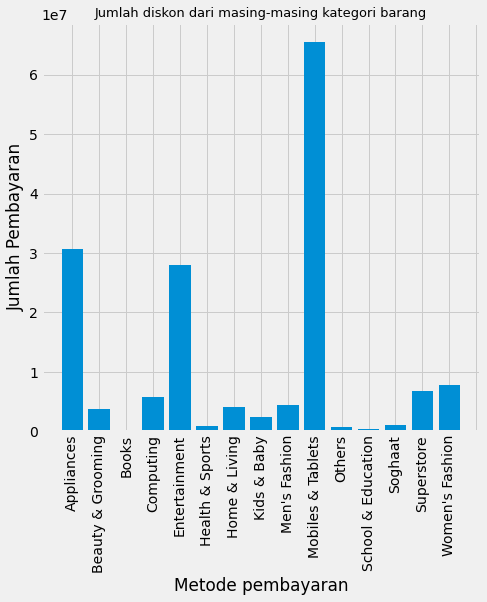

In [40]:
plt.figure(figsize=(7,7))
r= data.groupby('category_name_1')['discount_amount'].sum()
r=pd.DataFrame(r).reset_index()
plt.bar(r['category_name_1'], r['discount_amount'])
plt.title('Jumlah diskon dari masing-masing kategori barang', fontsize=13)
plt.xticks(np.arange(16), rotation=90)
plt.xlabel('Metode pembayaran')
plt.ylabel('Jumlah Pembayaran')
plt.show()

### Analisis

Berdasarkan grafik di atas diketahui bahwa diskon mobiles&tablets paling besar (65 juta) yang di susul peralatan (30 juta) dan entertaiment (28 juta).

### Rekomendasi

Dengan mengacu kepada business question nomor 5 yakni jumlah total harga pembelian per masing masing kategori barang menunjukkan bahwa persebaran diskon dari masing-masing kategori barang sudah sesuai dengan persebaran keuntungan total dari kategori barang. Hal ini sangat baik dan harus diteruskan untuk memaksimalkan potensi keuntungan kedepannya.  